
<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Flat files 

### tabular data as a text file with fields in each record separated by delimitters (e.g commas, tabs, spaces, semi-colons)
    
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp
%matplotlib inline

In [2]:
# Import the Rotten Tomatoes bestofrt TSV file into a DataFrame
df1 = pd.read_csv('bestofrt.tsv', sep = '\t')

In [3]:
# Check to see if the file was imported correctly
df1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370



<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Web Scraping
    
### Accessing data from websites using code
    
</div>

The Hypertext Markup Language (or HTML) is the language used to create documents for the World Wide Web.

The two main ways to work with HTML files are:

- Saving the HTML file to your computer (using the Requests library for example) library and reading that file into a BeautifulSoup constructor
- Reading the HTML response content directly into a BeautifulSoup constructor (again using the Requests library for example)

In [4]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [5]:
# to open and read the contents of an html file

# file can be named anything
# soup can be named anythin
# 'lxml' is the parser we specified (if we dont specify any this is the defualt parser anyway)

with open ('rt_html/et_the_extraterrestrial.html') as file: # file can be named anything
    soup = BeautifulSoup (file, 'lxml')
disp(soup)

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="//cdn.optimizely.com/js/594670329.js"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
<meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
<script id="jsonLdSchema" type="application/ld+json">{"@context":"http

In [6]:
# to find a specific tag inside an html

# This will just return the first tag found by this name
disp(soup.find('title'))

# we know there is only one title tag, if there were more and we only needed the first one we could use
disp(soup.find_all('title', limit =1))

disp(soup.find_all('span', limit =5))

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

[<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>]

[<span class="glyphicon glyphicon-remove"></span>,
 <span aria-hidden="true">×</span>,
 <span class="sr-only">Close</span>,
 <span style="background-color:white">From the Critics</span>,
 <span class="icon huge fresh"></span>]

In [7]:
# Now we see the title string as follows

# <title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>
# we need to get rid of the "- Rotten Tomatoes" at the end

# We can get the contents of the tag grabbed as follows
disp(soup.find('title').contents)

# There might be some unicode charaters such as the unicode space \xa0
# Now lets remove the unwanted part

title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0', ' ')
disp(title)

['E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes']

'E.T. The Extra-Terrestrial (1982)'


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Beautifful soup and finding data from html trees
    
### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree  
    
</div>



In [8]:
# To see all tages present inside the file
tag_list = []
for tag in soup.find_all(True):
    tag_list.append(tag.name)
    
disp(pd.Series(tag_list).shape[0])
disp(pd.Series(tag_list).unique())

1973

array(['html', 'head', 'script', 'meta', 'link', 'noscript', 'img',
       'title', 'body', 'div', 'button', 'span', 'ul', 'li', 'a', 'h2',
       'p', 'h3', 'nav', 'form', 'input', 'em', 'i', 'table', 'tr', 'td',
       'aside', 'br', 'section', 'h1', 'time', 'style', 'footer'],
      dtype=object)

In [9]:
import re # importing the regular expressions library

# for finding a certain string in the document
soup.find(string=re.compile("Average"))

'Average Rating: '

In [10]:
# To further advance the search
def has_class_but_no_id(tag):
    # tags can have multiple attributes , id and class are amongst those attributes
    return tag.has_attr('class') and not tag.has_attr('id')  

soup.find_all(has_class_but_no_id) # find_all methods can take a function as an input and applyit to the tags

[<body class="body">
 <script>console.info("body-top:" + window.performance.now());</script>
 <div id="emptyPlaceholder"></div> <div id="fb-root"></div>
 <script>
 require(['jquery', 'facebook', 'globals'], function($, FB, RT) {
     FB.init({
         appId: '326803741017',
         version : 'v2.9',
         status: true,
         cookie: true,
         xfbml: true
     });
 
     // FB scripts ready. (Does not imply logged in)
     RT.fb_ready.resolve();
 });
 </script><script>console.info("facebook:" + window.performance.now());</script>
 <!-- TODO: Put in long term targeting fix -->
 <div id="overlay" style="height:0px;"></div>
 <script>
     var mps=mps||{}; mps._queue=mps._queue||{}; mps._queue.gptloaded=mps._queue.gptloaded||[];
     mps._queue.gptloaded.push(function() {
         if (mps.getResponsiveSet() !='0') { //DESKTOP or TABLET
             require(["js-cookie"], function(Cookies){
                 var pageViewCount = Cookies.get("pvc");
                 if (pageViewCou

In [11]:


def is_a_rating(class_): # class cannot be used as it clashes with the python keyword class
    return class_ and re.compile("meter-value").search(class_)

# to find all tags with class attribute named "meter-value"
disp(soup.find_all(class_= is_a_rating))

# or simply use
disp(soup.find_all(class_= "meter-value"))

def get_audience_score(soup_):
    get_score = soup_.find_all(class_= "meter-value")
    get_score = get_score[-1].text.split('\n') 
    get_score = get_score[1].strip()[:-1]
    return get_score

get_audience_score(soup)



[<span class="meter-value superPageFontColor"><span>98</span>%</span>,
 <span class="meter-value superPageFontColor"><span>96</span>%</span>,
 <div class="meter-value">
 <span class="superPageFontColor" style="vertical-align:top">72%</span>
 </div>]

[<span class="meter-value superPageFontColor"><span>98</span>%</span>,
 <span class="meter-value superPageFontColor"><span>96</span>%</span>,
 <div class="meter-value">
 <span class="superPageFontColor" style="vertical-align:top">72%</span>
 </div>]

'72'

In [12]:
# more compact and efficient way

def get_audience_score_alternate(soup_): # more compact and efficient
    get_score = soup_.find('div', class_= "meter-value").find('span').contents[0][:-1]
    return get_score
get_audience_score_alternate(soup)

'72'

In [13]:
# To find the tag for searching the audience ratings
def is_user_ratings(tag):
    # tags can have multiple attributes , id and class are amongst those attributes
    return tag.text == 'User Ratings:' 

def get_audience_ratings(soup_):
    user_ratings_num = soup_.find_all(is_user_ratings)[0].parent.text
    user_ratings_num = user_ratings_num.split('\n') 
    user_ratings_num = user_ratings_num[2].strip().replace(',','')
    return user_ratings_num

def get_audience_ratings1(soup_):
    user_ratings_num = soup_.find_all(is_user_ratings)[0].contents
    return user_ratings_num

get_audience_ratings1(soup)
# find_all methods can take a function as an input and applyit to the tags

['User Ratings:']

In [14]:
# more compact and efficient way

def get_audience_ratings_alternate(soup_): # more compact and efficient
    get_score = soup_.find('span', text= 'User Ratings:').parent.text[:-1].split('\n')[2].strip().replace(',','')
    return get_score
get_audience_ratings_alternate(soup)

'3231303'

In [15]:
# Now lets extract the title, aucience score and the number of audience ratings an put it in a dataframe

In [16]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        soup = BeautifulSoup (file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0', ' ')
        audience_score = get_audience_score_alternate(soup)
        num_audience_ratings = get_audience_ratings_alternate(soup)
        # Note: a correct implementation may take ~15 seconds to run
        
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df2 = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])
df2

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,10367
1,The 39 Steps (1935),86,2364
2,The Adventures of Robin Hood (1938),89,3358
3,All About Eve (1950),94,4456
4,All Quiet on the Western Front (1930),89,1776
...,...,...,...
95,Up (2009),90,120187
96,Vertigo (1958),93,10145
97,The Wages of Fear (1953),95,853
98,Wonder Woman (2017),90,11295


## Solution Test
Run the cell below the see if your solution is correct. If an `AssertionError` is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [17]:
'''
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)
'''

assert df2.isnull().sum().sum() == 0 # checking for nans

In [107]:
# lets merge the datasets df1 and df2 based on the movie titles to plot critic reviews vs the audience reviews

df_combined = df1.set_index('title').join(df2.set_index('title'), how='inner')

df_combined

,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
title,,,,,
The Wizard of Oz (1939),1,99,110,89,87442
Citizen Kane (1941),2,100,75,90,15727
The Third Man (1949),3,100,77,93,5308
Get Out (2017),4,99,282,87,6383
Mad Max: Fury Road (2015),5,97,370,86,12393
...,...,...,...,...,...
Man on Wire (2008),96,100,156,87,2982
Jaws (1975),97,97,74,90,94221
Toy Story (1995),98,100,78,92,110773


In [108]:
df_combined = df_combined.reset_index()
df_combined

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,87442
1,Citizen Kane (1941),2,100,75,90,15727
2,The Third Man (1949),3,100,77,93,5308
3,Get Out (2017),4,99,282,87,6383
4,Mad Max: Fury Road (2015),5,97,370,86,12393
...,...,...,...,...,...,...
92,Man on Wire (2008),96,100,156,87,2982
93,Jaws (1975),97,97,74,90,94221
94,Toy Story (1995),98,100,78,92,110773
95,"The Godfather, Part II (1974)",99,97,72,97,40957


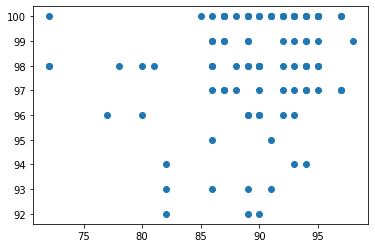

In [20]:
plt.scatter(df_combined.audience_score, df_combined.critic_score )


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# os library (directory management) and file handling practice
    
</div>

In [21]:
import os

# some practice with os library (for local reading and writing)

# to create a folder in our working directory
folder_name = "first folder"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# save our file in the new folder
df_combined.to_csv('first folder/rottentom100.csv')

In [22]:
# saving file in different paths

desktop_dir = 'C:/Users/h/Desktop/test_dir'
c_dir = 'C:/test_dir'
project_dir = 'C:/Users/h/Desktop/Data/Udacity/Data Analyst/Coursework/Project 5 Data Wrangling/test_dir'

df_combined.to_csv(desktop_dir + '/rottentom100.csv', index = False)
df_combined.to_csv(c_dir + '/rottentom100.csv', index = False)
df_combined.to_csv(project_dir + '/rottentom100.csv', index = False)

In [23]:
# reading files from different directories

df_desktop = pd.read_csv(desktop_dir + '/rottentom100.csv')
df_c = pd.read_csv(c_dir + '/rottentom100.csv')
df_project= pd.read_csv(project_dir + '/rottentom100.csv')

In [24]:
df_desktop.head(2)

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,87442
1,Citizen Kane (1941),2,100,75,90,15727


In [25]:
df_c.head(2)

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,87442
1,Citizen Kane (1941),2,100,75,90,15727


In [26]:
df_project.head(2)

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,The Wizard of Oz (1939),1,99,110,89,87442
1,Citizen Kane (1941),2,100,75,90,15727


In [27]:
# changing the working directory

os.chdir(desktop_dir)
os. getcwd()

'C:\\Users\\h\\Desktop\\test_dir'

In [28]:
# lets change it back to the usual
try:
    f = open('mytextfile.txt', 'r')
except Exception as e:
   # some code
   print("Exception occurred: {}".format(e))
    
# now lets change it back
os.chdir('C:/Users/h')
f = open('mytextfile.txt', 'r')
f.close()

Exception occurred: [Errno 2] No such file or directory: 'mytextfile.txt'


In [29]:
# File handling (reading)

f = open('mytextfile.txt', 'r')
print(type(f))
print(f)
file_data = f.read()
f.close()
print(type(file_data))
print(file_data)

<class '_io.TextIOWrapper'>
<_io.TextIOWrapper name='mytextfile.txt' mode='r' encoding='cp1252'>
<class 'str'>
HELLO THERE!


In [30]:
# File handling (writing/creating)

f = open('mytextfile.txt', 'w') # Will overwrite old file with a same name or create a new one if doesnt exist
# Error ===> file_data = f.read()
# error UnsupportedOperation since file is open in write mode
f.write("HELLO THERE!")
f.close()
f = open('mytextfile.txt', 'r')
print(f.read())
f.close()

HELLO THERE!


In [31]:
# with keyword for automatic closing of file
with open('mytextfile.txt', 'r') as f:
    file_data = f.read()
print(file_data)

HELLO THERE!


In [32]:
# looping to get characters per line

with open("mytextfile.txt") as file:
    for line in file:
        for word in line:
            # Append to list of dictionaries
            df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})

In [33]:
# using .strip() method to get rid of the end line character

with open("camelot.txt") as file:
    for line in file:
        print(line.strip())


We're the knights of the round table
We dance whenever we're able


In [34]:
# using .split() method to get words from each line

with open("camelot.txt") as file:
    for line in file:
        line_words = line.strip().split(" ")
        for word in line_words:
            print(word)

We're
the
knights
of
the
round
table
We
dance
whenever
we're
able


In [35]:
# PRACTICE: reading a csv (or any flat file) manually into a dataframe

In [36]:
df_pd = pd.read_csv('fake-company.csv')
df_pd

,Year,Name,Department,Age,Salary
0,1990,Alice,HR,25,50000
1,1990,Bob,RD,30,48000
2,1990,Charlie,Admin,45,55000
3,1991,Dakota,HR,26,52000
4,1991,Elsa,RD,31,50000
5,1991,Frank,Admin,46,60000
6,1992,Grace,Admin,27,60000
7,1992,Hoffman,RD,32,52000
8,1992,Inaar,Admin,28,62000


In [37]:
# reading csv file

def custom_csv_reader(filepath, delimiter = ","):
 
 # delimiter type (if not comma)
    
    df_list = []
    labels = []
    label_check = 1
    with open(filepath) as file:
        for line in file:
            line_words = line.strip().split(delimiter)
            # Append to list of dictionaries
            if (label_check == 0):
                record_dict = {}
                for i in range(len(line_words)):
                    record_dict[labels[i]] = line_words[i]
                df_list.append(record_dict)
            else:
                labels = line.strip().split(delimiter)
            label_check = 0

    df_file = pd.DataFrame(df_list, columns = labels)
    return df_file

In [38]:
custom_csv_reader("fake-company.csv")

,Year,Name,Department,Age,Salary
0,1990,Alice,HR,25,50000
1,1990,Bob,RD,30,48000
2,1990,Charlie,Admin,45,55000
3,1991,Dakota,HR,26,52000
4,1991,Elsa,RD,31,50000
5,1991,Frank,Admin,46,60000
6,1992,Grace,Admin,27,60000
7,1992,Hoffman,RD,32,52000
8,1992,Inaar,Admin,28,62000


In [39]:
custom_csv_reader("bestofrt.tsv", delimiter = '\t')

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370
...,...,...,...,...
95,96,100,Man on Wire (2008),156
96,97,97,Jaws (1975),74
97,98,100,Toy Story (1995),78
98,99,97,"The Godfather, Part II (1974)",72



<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Downloading files programmaitcaly 

### Instead of doing it manually, dowloading files programatically is good for scalability and reproducibility.
    
</div>

# In python, files are downlaoded using the "requests" Library

**HTTP** (Hypertext Transfer Protocol)
HTTP, the Hypertext Transfer Protocol, is the language that web browsers (like Chrome or Safari) and web servers (basically computers where the contents of a website are stored) speak to each other. Every time you open a web page, or download a file, or watch a video, it's HTTP that makes it possible.

HTTP is a **request/response** protocol:

- Your computer, a.k.a. the client, sends a request to a server for some file. For this lesson: "Get me the file 1-the-wizard-of-oz-1939-film.txt", for example. GET is the name of the HTTP request method (of which there are multiple) used for retrieving data.
- The web server sends back a response. If the request is valid: "Here is the file you asked for:", then followed by the contents of the 1-the-wizard-of-oz-1939-film.txt file itself.

In [40]:
import requests
import os

In [41]:
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [42]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [43]:
for url in ebert_review_urls:
    response = requests.get(url)
    break
response

<Response [200]>

In [44]:
# 200 is http code for request "succeeded"

In [45]:
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)
    break

os.listdir(folder_name)

['1-the-wizard-of-oz-1939-film.txt',
 '10-metropolis-1927-film.txt',
 '100-battleship-potemkin.txt',
 '11-e.t.-the-extra-terrestrial.txt',
 '12-modern-times-film.txt',
 '14-singin-in-the-rain.txt',
 '15-boyhood-film.txt',
 '16-casablanca-film.txt',
 '17-moonlight-2016-film.txt',
 '18-psycho-1960-film.txt',
 '19-laura-1944-film.txt',
 '2-citizen-kane.txt',
 '20-nosferatu.txt',
 '21-snow-white-and-the-seven-dwarfs-1937-film.txt',
 '22-a-hard-day27s-night-film.txt',
 '23-la-grande-illusion.txt',
 '25-the-battle-of-algiers.txt',
 '26-dunkirk-2017-film.txt',
 '27-the-maltese-falcon-1941-film.txt',
 '29-12-years-a-slave-film.txt',
 '3-the-third-man.txt',
 '30-gravity-2013-film.txt',
 '31-sunset-boulevard-film.txt',
 '32-king-kong-1933-film.txt',
 '33-spotlight-film.txt',
 '34-the-adventures-of-robin-hood.txt',
 '35-rashomon.txt',
 '36-rear-window.txt',
 '37-selma-film.txt',
 '38-taxi-driver.txt',
 '39-toy-story-3.txt',
 '4-get-out-film.txt',
 '40-argo-2012-film.txt',
 '41-toy-story-2.txt',
 

- On Windows, 'b' appended to the mode opens the file in binary mode, so there are also modes like 'rb', 'wb', and 'r+b'. Python on Windows makes a distinction between text and binary files; the end-of-line characters in text files are automatically altered slightly when data is read or written. This behind-the-scenes modification to file data is fine for ASCII text files, but it’ll corrupt binary data like that in JPEG or EXE files.

In [46]:
# We can see that the file has been writen in the directory

In [47]:
# Now lets run the loop for all urls

for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

os.listdir(folder_name)

['1-the-wizard-of-oz-1939-film.txt',
 '10-metropolis-1927-film.txt',
 '100-battleship-potemkin.txt',
 '11-e.t.-the-extra-terrestrial.txt',
 '12-modern-times-film.txt',
 '14-singin-in-the-rain.txt',
 '15-boyhood-film.txt',
 '16-casablanca-film.txt',
 '17-moonlight-2016-film.txt',
 '18-psycho-1960-film.txt',
 '19-laura-1944-film.txt',
 '2-citizen-kane.txt',
 '20-nosferatu.txt',
 '21-snow-white-and-the-seven-dwarfs-1937-film.txt',
 '22-a-hard-day27s-night-film.txt',
 '23-la-grande-illusion.txt',
 '25-the-battle-of-algiers.txt',
 '26-dunkirk-2017-film.txt',
 '27-the-maltese-falcon-1941-film.txt',
 '29-12-years-a-slave-film.txt',
 '3-the-third-man.txt',
 '30-gravity-2013-film.txt',
 '31-sunset-boulevard-film.txt',
 '32-king-kong-1933-film.txt',
 '33-spotlight-film.txt',
 '34-the-adventures-of-robin-hood.txt',
 '35-rashomon.txt',
 '36-rear-window.txt',
 '37-selma-film.txt',
 '38-taxi-driver.txt',
 '39-toy-story-3.txt',
 '4-get-out-film.txt',
 '40-argo-2012-film.txt',
 '41-toy-story-2.txt',
 

- On Windows, 'b' appended to the mode opens the file in binary mode, so there are also modes like 'rb', 'wb', and 'r+b'. Python on Windows makes a distinction between text and binary files; the end-of-line characters in text files are automatically altered slightly when data is read or written. This behind-the-scenes modification to file data is fine for ASCII text files, but it’ll corrupt binary data like that in JPEG or EXE files.

## Solution Test
Run the cell below the see if your solution is correct. If an `AssertionError` is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [48]:
'''
import filecmp
dc = filecmp.dircmp('ebert_reviews', 'ebert_reviews_solution')
assert len(dc.common) == 88
'''

"\nimport filecmp\ndc = filecmp.dircmp('ebert_reviews', 'ebert_reviews_solution')\nassert len(dc.common) == 88\n"


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Encodings
    
</div>

 

### The Single Most Important Fact About Encodings

If you completely forget everything I just explained, please remember one extremely important fact. It does not make sense to have a string without knowing what encoding it uses. You can no longer stick your head in the sand and pretend that “plain” text is ASCII.

### There Ain’t No Such Thing As Plain Text

If you have a string, in memory, in a file, or in an email message, you have to know what encoding it is in or you cannot interpret it or display it to users correctly.

Almost every stupid “my website looks like gibberish” or “she can’t read my emails when I use accents” problem comes down to one naive programmer who didn’t understand the simple fact that if you don’t tell me whether a particular string is encoded using **UTF-8 or ASCII or ISO 8859-1 (Latin 1) or Windows 1252 (Western European)**, you simply cannot display it correctly or even figure out where it ends. There are over a hundred encodings and above code point 127, all bets are off.”

### Must read link
https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/ 

An article by Joel Spolsky entitled The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!) is a nice introduction to the topic and I greatly enjoy reading it every once in a while. I hesitate to refer people to it who have trouble understanding encoding problems though since, while entertaining, it is pretty light on actual technical details. I hope this article can shed some more light on what exactly an encoding is and just why all your text screws up when you least need it.

Any character can be encoded in many different bit sequences and any particular bit sequence can represent many different characters, depending on which encoding is used to read or write them. **The reason is simply because different encodings use different numbers of bits per characters and different values to represent different characters.”**
### link
https://kunststube.net/encoding/

# Unicode and Python
In Python 3, there is:

- one text type: str, which holds Unicode data and
- two byte types: bytes and bytearray

The Stack Overflow answers here explain the different use cases well.
https://stackoverflow.com/questions/6224052/what-is-the-difference-between-a-string-and-a-byte-string 

In [49]:
# b at the start is for a byte string

b'\xcf\x84o\xcf\x81\xce\xbdo\xcf\x82'.decode('utf-16')

'蓏콯캁澽苏'

In [50]:
# b at the start is for a byte string

b'\xcf\x84o\xcf\x81\xce\xbdo\xcf\x82'.decode('utf-8')

'τoρνoς'

# Unicode Transformation Format

UTF-8 only uses a byte to represent every code point resulting in a file size that is half to the same file encoded in UT-16 which uses 2 bytes, and a quarter to the same file encoded in UTF-32 which uses 4.

### Summary:
1. Unicode is the standard for computers to display and manipulate text while UTF-8 is one of the many mapping methods for Unicode
2. UTF-8 is a mapping method the retains compatibility with the older ASCII
3. UTF-8 is the most space efficient mapping method for Unicode compared to other encoding methods
4. UTF-8 is the most used Unicode standard for the web

Read more: Difference Between Unicode and UTF-8 | Difference Between http://www.differencebetween.net/technology/difference-between-unicode-and-utf-8/#ixzz6mYMCQA4N

# Reading all files in a folder

Two methods:

- use os library as before
- glob — Unix style pathname pattern expansion

In [51]:
folder_name = 'ebert_reviews'
for ebert_review in os.listdir(folder_name):
    print(os.path.join(folder_name, ebert_review))
    with open(os.path.join(folder_name, ebert_review),encoding="utf-8") as file:
        print(file.read())
    break

ebert_reviews\1-the-wizard-of-oz-1939-film.txt
The Wizard of Oz (1939)
http://www.rogerebert.com/reviews/great-movie-the-wizard-of-oz-1939
As a child I simply did not notice whether a movie was in color or not. The movies themselves were such an overwhelming mystery that if they wanted to be in black and white, that was their business. It was not until I saw "The Wizard of Oz" for the first time that I consciously noticed B&W versus color, as Dorothy was blown out of Kansas and into Oz. What did I think? It made good sense to me.

The switch from black and white to color would have had a special resonance in 1939, when the movie was made. Almost all films were still being made in black and white, and the cumbersome new color cameras came with a “Technicolor consultant” from the factory, who stood next to the cinematographer and officiously suggested higher light levels. Shooting in color might have been indicated because the film was MGM's response to the huge success of Disney's pione

In [52]:
# Now lets remove the break statement and read all files

folder_name = 'ebert_reviews'
all_files = []
for ebert_review in os.listdir(folder_name):
    with open(os.path.join(folder_name, ebert_review),encoding="utf8") as file:
        all_files.append(file.read())
    
len(all_files)

88


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# What if not all files in this folder were txt files?

### we can use the glob library to make it easier
    
https://docs.python.org/3/library/glob.html 
    
</div>




In [53]:
import glob

folder_name = 'ebert_reviews'
all_files = []
for ebert_review in glob.glob(folder_name + '/*.txt'): # using wildcards to create file path patterns
    with open(os.path.join(ebert_review),encoding="utf-8") as file:
        all_files.append(file.read())
    
len(all_files)

88

In [54]:
# Now we want to get the title, review_url and the review_text to populate a datafame

import glob

folder_name = 'ebert_reviews'
df_list = []
for ebert_review in glob.glob(folder_name + '/*.txt'): # using wildcards to create file path patterns
    with open(ebert_review,encoding="utf-8") as file:
        title = file.readline()[:-1] # dropping the end line character
        review_url = file.readline()[:-1]
        review_text = file.read()
    df_list.append({'title': title,
                    'review_url': review_url,
                    'review_text': review_text})
df_rev = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text' ])
df_rev

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."
...,...,...,...
83,The Grapes of Wrath (1940),http://www.rogerebert.com/reviews/great-movie-...,"John Ford's ""The Grapes of Wrath"" is a left-wi..."
84,Man on Wire (2008),http://www.rogerebert.com/reviews/man-on-wire-...,I am afraid of heights. Now you know. That is ...
85,Jaws (1975),http://www.rogerebert.com/reviews/great-movie-...,"""You're going to need a bigger boat.""\n\nSo th..."
86,Toy Story (1995),http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple..."


In [55]:
# combining all data gathered so far

df_combined_v2 = df_combined.set_index('title').join(df_rev.set_index('title'), how='inner')
df_combined_v2 = df_combined_v2.reset_index()
df_combined_v2

,title,ranking,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,review_url,review_text
0,The Wizard of Oz (1939),1,99,110,89,87442,http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Citizen Kane (1941),2,100,75,90,15727,http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
2,The Third Man (1949),3,100,77,93,5308,http://www.rogerebert.com/reviews/great-movie-...,Has there ever been a film where the music mor...
3,Get Out (2017),4,99,282,87,6383,http://www.rogerebert.com/reviews/get-out-2017,"With the ambitious and challenging “Get Out,” ..."
4,Mad Max: Fury Road (2015),5,97,370,86,12393,http://www.rogerebert.com/reviews/mad-max-fury...,George Miller’s “Mad Max” films didn’t just ma...
...,...,...,...,...,...,...,...,...
80,Man on Wire (2008),96,100,156,87,2982,http://www.rogerebert.com/reviews/man-on-wire-...,I am afraid of heights. Now you know. That is ...
81,Jaws (1975),97,97,74,90,94221,http://www.rogerebert.com/reviews/great-movie-...,"""You're going to need a bigger boat.""\n\nSo th..."
82,Toy Story (1995),98,100,78,92,110773,http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple..."
83,"The Godfather, Part II (1974)",99,97,72,97,40957,http://www.rogerebert.com/reviews/great-movie-...,The musical score plays an even greater role i...


## Solution Test
Run the cell below the see if your solution is correct. If an `AssertionError` is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [56]:
'''
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)
'''
assert df2.isnull().sum().sum() == 0 # checking for nans


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    
# Extracting poster images
    
</div>




In [57]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import re
import glob

In [58]:
# can be done through extracting the image url from the html

In [59]:
# using os library

df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        # Your code here
        soup = BeautifulSoup (file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0', ' ')
        image_url = soup.find('img', class_ = 'posterImage')['src'] # (this how to access tags that are in a single set of <>)
        # Note: a correct implementation may take ~15 seconds to run
        
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'image_url': image_url})
df_img = pd.DataFrame(df_list, columns = ['title', 'image_url'])
df_img

,title,image_url
0,12 Angry Men (Twelve Angry Men) (1957),https://resizing.flixster.com/GQVZGdAYpbIxgyP5...
1,The 39 Steps (1935),https://resizing.flixster.com/mrJduNa8kkFcWY-G...
2,The Adventures of Robin Hood (1938),https://resizing.flixster.com/wqnnSAHa2c1oz0i-...
3,All About Eve (1950),https://resizing.flixster.com/P6shpXIiq0GTf5yM...
4,All Quiet on the Western Front (1930),https://resizing.flixster.com/qXA5VFEvqNl0UBoo...
...,...,...
95,Up (2009),https://resizing.flixster.com/LnIYKDRwfCPuxDDo...
96,Vertigo (1958),https://resizing.flixster.com/co9pl17rpD0rPyh3...
97,The Wages of Fear (1953),https://resizing.flixster.com/s2SYlE83VqfAq-OI...
98,Wonder Woman (2017),https://resizing.flixster.com/smbvR6AkrViictiF...


In [60]:
# using glob library

folder_name = 'rt_html'
df_list = []
for ebert_review in glob.glob(folder_name + '/*.html'): # using wildcards to create file path patterns
    with open(ebert_review) as file:
        soup = BeautifulSoup (file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')].replace('\xa0', ' ')
        image_url = soup.find('img', class_ = 'posterImage')['src']
    df_list.append({'title': title,
                    'image_url': image_url})
df_img = pd.DataFrame(df_list, columns = ['title', 'image_url' ])
df_img

,title,image_url
0,12 Angry Men (Twelve Angry Men) (1957),https://resizing.flixster.com/GQVZGdAYpbIxgyP5...
1,The 39 Steps (1935),https://resizing.flixster.com/mrJduNa8kkFcWY-G...
2,The Adventures of Robin Hood (1938),https://resizing.flixster.com/wqnnSAHa2c1oz0i-...
3,All About Eve (1950),https://resizing.flixster.com/P6shpXIiq0GTf5yM...
4,All Quiet on the Western Front (1930),https://resizing.flixster.com/qXA5VFEvqNl0UBoo...
...,...,...
95,Up (2009),https://resizing.flixster.com/LnIYKDRwfCPuxDDo...
96,Vertigo (1958),https://resizing.flixster.com/co9pl17rpD0rPyh3...
97,The Wages of Fear (1953),https://resizing.flixster.com/s2SYlE83VqfAq-OI...
98,Wonder Woman (2017),https://resizing.flixster.com/smbvR6AkrViictiF...



<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    

# API (Application Programmable Interface) and Access Libraries

### APIs are used to access data from the internet (without downloading any files)
    
**MEDIAWIKI** is an open source API for wikipedia (company led APIS e.d twitter etc will make you apply first).<br>
https://www.mediawiki.org/wiki/API:Tutorial 
    
 For a MediaWiki, the most up to date and human readable one in Python is called wptools (https://github.com/siznax/wptools). The analogous relationship for Twitter is:

MediaWiki API → wptools https://github.com/siznax/wptools/wiki/Usage#page-usage  <br>
Twitter API → tweepy
    
***In comparison, Scraping is brittle and will break with any changes in the actual webpage***
</div>






<div style="background-color:rgba(0, 225, 0, 0.15)"> 

## install git for python by $ pip install gitpython    
### https://www.devdungeon.com/content/working-git-repositories-python#:~:text=To%20clone%20a%20remote%20repository,clone_from()
    
</div>





In [61]:
import git

# git.Repo.clone_from('https://github.com/siznax/wptools', 'wptools')

# Now the github repo has been cloned into our working directory

In [62]:
# just exploring the sys library

import sys
print (sys.path) # a list of directories where the code will search for any files that need to be imported
sys.path.insert(0, "C:/Users/h/")
print (sys.path)




['C:\\Users\\h', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\git\\ext\\gitdb', 'C:\\Users\\h\\anaconda3\\python38.zip', 'C:\\Users\\h\\anaconda3\\DLLs', 'C:\\Users\\h\\anaconda3\\lib', 'C:\\Users\\h\\anaconda3', '', 'C:\\Users\\h\\anaconda3\\lib\\site-packages', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\h\\.ipython', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\gitdb\\ext\\smmap']
['C:/Users/h/', 'C:\\Users\\h', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\git\\ext\\gitdb', 'C:\\Users\\h\\anaconda3\\python38.zip', 'C:\\Users\\h\\anaconda3\\DLLs', 'C:\\Users\\h\\anaconda3\\lib', 'C:\\Users\\h\\anaconda3', '', 'C:\\Users\\h\\anaconda3\\lib\\site-packages', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\h\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\

## update wptools by pip install -U wptools 

In [63]:
# Your code here: get the E.T. page object
# This cell make take a few seconds to run
import wptools
# for the et page on wikipedia https://en.wikipedia.org/wiki/E.T._the_Extra-Terrestrial
page = wptools.page('E.T._the_Extra-Terrestrial')




In [64]:
page.get_query()

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (query) E.T. the Extra-Terrestrial (&plcontinue=...
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  description: <str(63)> 1982 American science fiction film direct...
  extext: <str(1629)> _**E.T. the Extra-Terrestrial**_ is a 1982 A...
  extract: <str(1729)> <p class="mw-empty-elt"></p><p><i><b>E.T. t...
  label: E.T. the Extra-Terrestrial
  length: 94,413
  links: <list(559)> 12 Angry Men (1957 film), 12 Monkeys, 12 Year...
  modified: <dict(1)> page
  pageid: 73441
  random: Chen Xiaowang
  redirects: <list(37)> {'pageid': 177061, 'ns': 0, 'title': 'E.T....
  requests: <list(2)> query, query
  title: E.T. the Extra-Terrestrial
  url: https://en.wikipedia.org/wiki/E.T._the_Extra-Terrestrial
  url_raw: <str(67)> https://en.wikipedia.org/wiki/E.T._the_Extra-...
  watchers: 338
  wikibase: Q11621

In [65]:
page = page.get()
page

www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) Q377616|Q505449|P3110|Q8436|Q830079|P27...
www.wikidata.org (labels) Q181508|Q5280675|Q103360|P1874|P2508|P3...
www.wikidata.org (labels) Q1315008|P725|Q130232|P1265|Q586356|P16...
www.wikidata.org (labels) Q258064|Q104144642|P272|P480|P3808|Q839...
www.wikidata.org (labels) Q435696|Q787098|Q23817729|P3077|Q249098...
+ query results in cache
en.wikipedia.org (parse) 73441
en.wikipedia.org (restbase) /page/summary/E.T. the Extra-Terrestrial
en.wikipedia.org (imageinfo) File:E t the extra terrestrial ver3....
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(117)> P1562, P57, P272, P345, P31, P161, P373, P48...
  description: 1982 film by Steven Spielberg
  exhtml: <str(370)> <p><i><b>E.T. the Extra-Terrestrial</b></i> i...
  exrest: <str(349)> E.T. the Extra-Terrestrial is a 1982 American...
 

In [66]:
page.data['image'][0] # the image key returns a json object which can be handled just like a dictionary

{'file': 'File:ET logo 3.svg',
 'kind': 'wikidata-image',
 'orig': 'ET logo 3.svg',
 'timestamp': '2011-05-14T20:38:17Z',
 'size': 77290,
 'width': 512,
 'height': 380,
 'url': 'https://upload.wikimedia.org/wikipedia/commons/8/85/ET_logo_3.svg',
 'descriptionurl': 'https://commons.wikimedia.org/wiki/File:ET_logo_3.svg',
 'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=14138952',
 'title': 'File:ET logo 3.svg',
 'metadata': {'DateTime': {'value': '2011-05-14 20:38:17',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'ObjectName': {'value': 'ET logo 3',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'CommonsMetadataExtension': {'value': 1.2,
   'source': 'extension',
   'hidden': ''},
  'Categories': {'value': 'E.T. the Extra-Terrestrial|PD textlogo|SVG text logos|With trademark',
   'source': 'commons-categories',
   'hidden': ''},
  'Assessments': {'value': '', 'source': 'commons-categories', 'hidden': ''},
  'ImageDescription': {'value': 'Opening

In [67]:
page.data['infobox']['director'] # the infobox key returns a json object which can be handled just like a dictionary

'[[Steven Spielberg]]'


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    

# JSON files
    
### Parsing JSON

</div>




In [68]:
import json 

# Take the following string containing JSON data:
json_string = '{"first_name": "Guido", "last_name":"Rossum"}'

# It can be parsed like this:
parsed_json = json.loads(json_string)

disp(type(json_string))
disp(type(parsed_json))

# It can now be used as a normal dictionary:
print(parsed_json['first_name'])


# You can also convert the following to JSON:
d = {
    'first_name': 'Guido',
    'second_name': 'Rossum',
    'titles': ['BDFL', 'Developer'],
}

print(json.dumps(d))
print(type(json.dumps(d)))

str

dict

Guido
{"first_name": "Guido", "second_name": "Rossum", "titles": ["BDFL", "Developer"]}
<class 'str'>


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    

A slight variation on the json.dump method that's worth mentioning is **json.dumps**, which returns the actual JSON string instead of sending it directly to a writable object. This can give you some more control if you need to make some changes to the JSON string (like encrypting it, for example).

</div>




In [69]:
# To create a json file and save it in th working directory

import json

data = {}
data['people'] = []
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
data['people'].append({
    'name': 'Tim',
    'website': 'apple.com',
    'from': 'Alabama'
})

with open('json_data.txt', 'w') as outfile:
    json.dump(data, outfile)
    
print(data)

with open('json_data.txt', 'r') as infile:
    print(infile.read())

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}, {'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'}]}
{"people": [{"name": "Scott", "website": "stackabuse.com", "from": "Nebraska"}, {"name": "Larry", "website": "google.com", "from": "Michigan"}, {"name": "Tim", "website": "apple.com", "from": "Alabama"}]}


In [70]:
# loading data into a json file that can be treated as a dictionary

with open('json_data.txt') as json_file:
    data = json.load(json_file)
    print(type(data))
    for p in data['people']:
        print('Name: ' + p['name'])
        print('Website: ' + p['website'])
        print('From: ' + p['from'])
        print('')

<class 'dict'>
Name: Scott
Website: stackabuse.com
From: Nebraska

Name: Larry
Website: google.com
From: Michigan

Name: Tim
Website: apple.com
From: Alabama



In [71]:
# improving the look of a json file using indent parameter

import json
data = {'people':[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}]}
with open('json_data_pretty.txt', 'w') as outfile:
    json.dump(data, outfile, indent=4)
    
with open('json_data_pretty.txt', 'r') as infile:
    print(infile.read())

{
    "people": [
        {
            "name": "Scott",
            "website": "stackabuse.com",
            "from": "Nebraska"
        }
    ]
}


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    

So the standard is saying that **key order** isn't guaranteed, but it's possible that you may need it for your own purposes internally. To achieve ordering, you can pass True to the sort_keys option when using json.dump or json.dumps.

</div>



In [72]:
# json file with sorted keys

import json
data = {'people':[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}]}
with open('json_data_pretty_sorted.txt', 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=True)
    
with open('json_data_pretty_sorted.txt', 'r') as infile:
    print(infile.read())

{
    "people": [
        {
            "from": "Nebraska",
            "name": "Scott",
            "website": "stackabuse.com"
        }
    ]
}


<div style="background-color:rgba(0, 225, 0, 0.15)"> 
    

**pandas** also has JSON functions (the **read_json** function and the **to_json** DataFrame method), but the hierarchical advantage of JSON is wasted in pandas' tabular DataFrame so the uses are limited.

</div>



In [73]:
df = pd.read_json('json_data.txt')
df

,people
0,"{'name': 'Scott', 'website': 'stackabuse.com',..."
1,"{'name': 'Larry', 'website': 'google.com', 'fr..."
2,"{'name': 'Tim', 'website': 'apple.com', 'from'..."


In [74]:
df = pd.read_csv('fake-company.csv')

df.to_json('json_fake_company.txt')

with open('json_fake_company.txt') as json_file:
    data = json.load(json_file)
    print(type(data))
    print(data)
    
df = pd.read_json('json_fake_company.txt')
disp(df)

<class 'dict'>
{'Year': {'0': 1990, '1': 1990, '2': 1990, '3': 1991, '4': 1991, '5': 1991, '6': 1992, '7': 1992, '8': 1992}, 'Name': {'0': 'Alice', '1': 'Bob', '2': 'Charlie', '3': 'Dakota', '4': 'Elsa', '5': 'Frank', '6': 'Grace', '7': 'Hoffman', '8': 'Inaar'}, 'Department': {'0': 'HR', '1': 'RD', '2': 'Admin', '3': 'HR', '4': 'RD', '5': 'Admin', '6': 'Admin', '7': 'RD', '8': 'Admin'}, 'Age': {'0': 25, '1': 30, '2': 45, '3': 26, '4': 31, '5': 46, '6': 27, '7': 32, '8': 28}, 'Salary': {'0': 50000, '1': 48000, '2': 55000, '3': 52000, '4': 50000, '5': 60000, '6': 60000, '7': 52000, '8': 62000}}


,Year,Name,Department,Age,Salary
0,1990,Alice,HR,25,50000
1,1990,Bob,RD,30,48000
2,1990,Charlie,Admin,45,55000
3,1991,Dakota,HR,26,52000
4,1991,Elsa,RD,31,50000
5,1991,Frank,Admin,46,60000
6,1992,Grace,Admin,27,60000
7,1992,Hoffman,RD,32,52000
8,1992,Inaar,Admin,28,62000



<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Finally we download all the images

</div>

**Downloading images** may seem tricky from a reading and writing perspective, in comparison to text files which you can read line by line, for example. But in reality, image files aren't special—they're just binary files. To interact with them, you don't need special software (like Photoshop or something) that "understands" images. You can use regular file opening, reading, and writing techniques.

In [75]:
try:
    import requests
    r = requests.get(url)
    with open(folder_name + '/' + filename, 'wb') as f:
            f.write(r.content)
except:
    print('does not run just a sample code')

does not run just a sample code


But this technique can be **error-prone**. It will work most of the time, but sometimes the file you write to will be damaged. This type of error is why the requests library maintainers recommend using the PIL library (short for Pillow) and BytesIO from the io library for non-text requests, like images. They recommend that you access the response body as bytes, for non-text requests. For example, to create an image from binary data returned by a request:

In [76]:
try:
    import requests
    from PIL import Image
    from io import BytesIO
    r = requests.get(url)
    i = Image.open(BytesIO(r.content))
except:
    print('does not run just a sample code')

does not run just a sample code


In [77]:
import pandas as pd
import wptools
import os
import requests
from PIL import Image
from io import BytesIO

In [78]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [79]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#### Note: the cell below, if correctly implemented, will likely take ~5 minutes to run.

In [85]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = page.get().data['image']
        # First image is usually the poster
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
        
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


One you have completed the above code requirements, read and run the three cells below and interpret their output.

In [86]:
for key in image_errors.keys():
    print(key)

22_A_Hard_Day%27s_Night_(film)
72_Rosemary%27s_Baby_(film)


In [87]:
# Inspect unidentifiable images and download them individually
for rank_title, images in image_errors.items():
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '53_12_Angry_Men_(1957_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/9/91/12_angry_men.jpg'
    if rank_title == '72_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/e/ef/Rosemarys_baby_poster.jpg'
    if rank_title == '93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2':
        url = 'https://upload.wikimedia.org/wikipedia/en/d/df/Harry_Potter_and_the_Deathly_Hallows_%E2%80%93_Part_2.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)

In [109]:
# Create DataFrame from list of dictionaries
df_poster = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df_poster = df_poster.sort_values('ranking').reset_index(drop=True)
df_poster

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
...,...,...,...
95,96,Man_on_Wire,https://upload.wikimedia.org/wikipedia/en/5/54...
96,97,Jaws_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
97,98,Toy_Story,https://upload.wikimedia.org/wikipedia/en/1/13...
98,99,The_Godfather_Part_II,https://upload.wikimedia.org/wikipedia/en/0/03...


In [113]:
# lets merge to get the master dataframe

try:
    df_poster.pop('title')
except:
    print('already poped')
df_master = df_combined.set_index('ranking').join(df_poster.set_index('ranking'), how='inner')
df_master = df_master.reset_index()
df_master.to_csv('rt_master.csv', index = False)
df_master

already poped


,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,poster_url
0,1,The Wizard of Oz (1939),99,110,89,87442,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,15727,https://upload.wikimedia.org/wikipedia/commons...
2,3,The Third Man (1949),100,77,93,5308,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get Out (2017),99,282,87,6383,https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad Max: Fury Road (2015),97,370,86,12393,https://upload.wikimedia.org/wikipedia/en/6/6e...
...,...,...,...,...,...,...,...
92,96,Man on Wire (2008),100,156,87,2982,https://upload.wikimedia.org/wikipedia/en/5/54...
93,97,Jaws (1975),97,74,90,94221,https://upload.wikimedia.org/wikipedia/en/e/eb...
94,98,Toy Story (1995),100,78,92,110773,https://upload.wikimedia.org/wikipedia/en/1/13...
95,99,"The Godfather, Part II (1974)",97,72,97,40957,https://upload.wikimedia.org/wikipedia/en/0/03...


In [115]:
# file comparison

df_test = pd.read_csv('fake-company.csv')
df_test.to_csv("testfile_1.csv", index = False)
df_test.to_csv("testfile_2.csv", index = False)

import filecmp
fc = filecmp.cmp('testfile_1.csv',
                 'testfile_2.csv')
assert fc
# as files are the same no assertion error is thrown


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# SQL Databases
    
we're going to do these in order:

- Connect to a database. We'll connect to a SQLite database using SQLAlchemy https://www.sqlalchemy.org/ , a database toolkit for Python.
- Store the data in the cleaned master dataset in that database. We'll do this using pandas' `to_sql` DataFrame method.
- Then read the brand new data in that database back into a pandas DataFrame. We'll do this using pandas' `read_sql` function.

</div>



## Relational Databases and pandas

In [116]:
import pandas as pd

In [117]:
###

Imagine this notebook contains all of the gathering code from this entire lesson, plus the assessing and cleaning code done behind the scenes, and that the final product is a merged master DataFrame called *df*.

In [118]:
df = pd.read_csv('rt_master.csv')

In [119]:
df.head(3)

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,poster_url
0,1,The Wizard of Oz (1939),99,110,89,87442,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,15727,https://upload.wikimedia.org/wikipedia/commons...
2,3,The Third Man (1949),100,77,93,5308,https://upload.wikimedia.org/wikipedia/commons...


In [120]:
###

### 1. Connect to a database

In [121]:
from sqlalchemy import create_engine

In [122]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

### 2. Store pandas DataFrame in database
Store the data in the cleaned master dataset (bestofrt_master) in that database.

In [123]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
df.to_sql('master', engine, index=False)

### 3. Read database data into a pandas DataFrame
Read the brand new data in that database back into a pandas DataFrame.

In [124]:
df_gather = pd.read_sql('SELECT * FROM master', engine)

In [125]:
df_gather.head(3)

,ranking,title,critic_score,number_of_critic_ratings,audience_score,number_of_audience_ratings,poster_url
0,1,The Wizard of Oz (1939),99,110,89,87442,https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen Kane (1941),100,75,90,15727,https://upload.wikimedia.org/wikipedia/commons...
2,3,The Third Man (1949),100,77,93,5308,https://upload.wikimedia.org/wikipedia/commons...


# Data Wrangling in SQL?
Data wrangling can actually be performed in SQL. We believe that pandas is better equipped for gathering (pandas has a huge simplicity advantage in this area), assessing, and cleaning data, so we usually recommend that you use pandas if given the choice. If wrangling in a work setting, sometimes your tool of choice for data wrangling depends on your company infrastructure, though.

Here is an interesting Reddit thread that debates pandas vs. SQL (https://www.reddit.com/r/Python/comments/1tqjt4/why_do_you_use_pandas_instead_of_sql/) in general and touches on several topics related to data wrangling.

# Additional, less common file formats include:

- Excel files: https://www.lifewire.com/what-is-an-xlsx-file-2622540 <br>
- Pickle files: https://stackoverflow.com/questions/7501947/understanding-pickling-in-python <br>
- HDF5 files: https://www.neonscience.org/resources/learning-hub/tutorials<br>
- SAS files: https://whatis.techtarget.com/ <br>
- STATA files: http://faculty.econ.ucdavis.edu/faculty/cameron/stata/stataintro.html <br>

pandas has **functions** (https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to read (and write, to most of them) these files. Also, you now have the foundational understanding of gathering and file formats in general, so learning these additional formats won't be too hard if you need them.